In [246]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [247]:
le = LabelEncoder()
one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

In [248]:
data = pd.read_csv('../data/processed/airbnb_clean.csv')

In [249]:
data

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,-1.0,False,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,3.0,Real Bed,strict,True,NYC,1.0,True,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,3.0,Real Bed,moderate,True,NYC,1.0,True,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,flexible,True,SF,-1.0,False,37.772004,-122.431619,0,-1.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,1.0,True,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,-1.0,False,40.709025,-73.939405,0,-1.0,1.0,1.0
74105,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,4.0,Real Bed,moderate,True,LA,1.0,False,33.871549,-118.396053,16,93.0,2.0,4.0
74106,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,2.0,Real Bed,moderate,True,NYC,1.0,True,40.706749,-73.942377,43,94.0,2.0,2.0
74107,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,2.0,Real Bed,strict,True,NYC,1.0,True,40.738535,-74.000157,0,-1.0,0.0,2.0


In [250]:
# transformar variables booleandas a 1 y 0
data['cleaning_fee'] = data['cleaning_fee'].astype(int)
data['instant_bookable'] = data['instant_bookable'].astype(int)

Property, Bed, Room Type

In [251]:
data["property_type"].value_counts()

property_type
Apartment             49002
House                 16511
Condominium            2657
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

In [252]:

encoded_array = one_hot.fit_transform(data[["property_type"]])

# Crear DataFrame con las columnas generadas
encoded_df = pd.DataFrame(encoded_array, columns=one_hot.get_feature_names_out(["property_type"]))
#Renombrar columnas
#encoded_df.rename(columns={"room_type_Entire home/apt": "Entire home/apt","room_type_Private room": "Private room", "room_type_Shared room": "Shared room"}, inplace=True)

# Concatenar con el DataFrame original
data = pd.concat([data.drop(columns=["property_type"]), encoded_df], axis=1)

data.head()

,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_response_rate,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
0,5.010635,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,1,NYC,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.129899,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,3.0,Real Bed,strict,1,NYC,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.976734,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,3.0,Real Bed,moderate,1,NYC,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.620073,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,flexible,1,SF,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.744932,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,1,DC,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
data["room_type"].value_counts()

room_type
Entire home/apt    41309
Private room       30638
Shared room         2162
Name: count, dtype: int64

In [254]:
# Podemos usar one hot encoding en room_type por la baja cantidad de categorias
data["room_type"] = data["room_type"].astype(str)

# Ajustar y transformar los datos
encoded_array = one_hot.fit_transform(data[["room_type"]])

# Crear DataFrame con las columnas generadas
encoded_df = pd.DataFrame(encoded_array, columns=one_hot.get_feature_names_out(["room_type"]))
#Renombrar columnas
encoded_df.rename(columns={"room_type_Entire home/apt": "Entire home/apt","room_type_Private room": "Private room", "room_type_Shared room": "Shared room"}, inplace=True)

# Concatenar con el DataFrame original
data = pd.concat([data.drop(columns=["room_type"]), encoded_df], axis=1)

data.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_response_rate,instant_bookable,...,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,Entire home/apt,Private room,Shared room
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,1,NYC,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,3.0,Real Bed,strict,1,NYC,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,3.0,Real Bed,moderate,1,NYC,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,flexible,1,SF,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,1,DC,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [255]:
data["bed_type"].value_counts()

bed_type
Real Bed         72026
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: count, dtype: int64

In [256]:
# Podemos usar one hot encoding en bed_type por la baja cantidad de categorias
data["bed_type"] = data["bed_type"].astype(str)

# Ajustar y transformar los datos
encoded_array = one_hot.fit_transform(data[["bed_type"]])

# Crear DataFrame con las columnas generadas
encoded_df = pd.DataFrame(encoded_array, columns=one_hot.get_feature_names_out(["bed_type"]))
#Renombrar columnas
encoded_df.rename(columns={"bed_type_Airbed": "Airbed","bed_type_Couch": "Couch", "bed_type_Futon": "Futon", "bed_type_Pull-out Sofa": "Pullout Sofa", "bed_type_Real Bed" : "Real Bed"}, inplace=True)

# Concatenar con el DataFrame original
data = pd.concat([data.drop(columns=["bed_type"]), encoded_df], axis=1)

data.head()

,log_price,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,host_response_rate,instant_bookable,latitude,...,property_type_Villa,property_type_Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pullout Sofa,Real Bed
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,strict,1,NYC,-1.0,0,40.696524,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,3.0,strict,1,NYC,1.0,1,40.766115,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,3.0,moderate,1,NYC,1.0,1,40.808110,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,flexible,1,SF,-1.0,0,37.772004,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,moderate,1,DC,1.0,1,38.925627,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [257]:
data["cancellation_policy"].value_counts()

cancellation_policy
strict             32373
flexible           22544
moderate           19063
super_strict_30      112
super_strict_60       17
Name: count, dtype: int64

In [258]:
# Podemos usar one hot encoding en cancelation policy por la baja cantidad de categorias
data["cancellation_policy"] = data["cancellation_policy"].astype(str)

# Ajustar y transformar los datos
encoded_array = one_hot.fit_transform(data[["cancellation_policy"]])

# Crear DataFrame con las columnas generadas
encoded_df = pd.DataFrame(encoded_array, columns=one_hot.get_feature_names_out(["cancellation_policy"]))
#Renombrar columnas
#encoded_df.rename(columns={"bed_type_Airbed": "Airbed","bed_type_Couch": "Couch", "bed_type_Futon": "Futon", "bed_type_Pull-out Sofa": "Pullout Sofa", "bed_type_Real Bed" : "Real Bed"}, inplace=True)

# Concatenar con el DataFrame original
data = pd.concat([data.drop(columns=["cancellation_policy"]), encoded_df], axis=1)

data.head()

,log_price,amenities,accommodates,bathrooms,cleaning_fee,city,host_response_rate,instant_bookable,latitude,longitude,...,Airbed,Couch,Futon,Pullout Sofa,Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,NYC,-1.0,0,40.696524,-73.991617,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,3.0,1,NYC,1.0,1,40.766115,-73.989040,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,3.0,1,NYC,1.0,1,40.808110,-73.943756,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,1,SF,-1.0,0,37.772004,-122.431619,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,DC,1.0,1,38.925627,-77.034596,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Amenities

In [259]:
type(data["amenities"][0])

str

In [260]:
#eliminar {}
data["amenities"] = data["amenities"].str.replace(r"[{}]", '', regex=True)
#eliminar comillas
data['amenities'] = data['amenities'].apply(lambda x: x.replace('"', ''))
#separar valores por las comas en un set
data["amenities"] = data["amenities"].apply(lambda x: set(x.split(",")))

In [261]:
data["amenities"].head()

0    {Hair dryer, Kitchen, Essentials, Iron, Heatin...
1    {Hair dryer, Kitchen, Essentials, Dryer, Smoke...
2    {Shampoo, Carbon monoxide detector, translatio...
3    {Cable TV, Kitchen, Essentials, Buzzer/wireles...
4    {Elevator in building, Kitchen, Essentials, Sm...
Name: amenities, dtype: object

In [262]:
# Crear columnas binarias para cada amenidad única
df_expanded = data["amenities"].str.join('|').str.get_dummies(sep="|")

In [263]:
df_expanded

,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
74106,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
74107,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Mantener amenities relevantes

In [264]:
for i in df_expanded.columns:
    print(i)

 smooth pathway to front door
24-hour check-in
Accessible-height bed
Accessible-height toilet
Air conditioning
Air purifier
BBQ grill
Baby bath
Baby monitor
Babysitter recommendations
Bath towel
Bathtub
Bathtub with shower chair
Beach essentials
Beachfront
Bed linens
Body soap
Breakfast
Buzzer/wireless intercom
Cable TV
Carbon monoxide detector
Cat(s)
Changing table
Children’s books and toys
Children’s dinnerware
Cleaning before checkout
Coffee maker
Cooking basics
Crib
Disabled parking spot
Dishes and silverware
Dishwasher
Dog(s)
Doorman
Doorman Entry
Dryer
EV charger
Elevator
Elevator in building
Essentials
Ethernet connection
Extra pillows and blankets
Family/kid friendly
Fire extinguisher
Fireplace guards
Firm matress
Firm mattress
First aid kit
Fixed grab bars for shower & toilet
Flat
Flat smooth pathway to front door
Free parking on premises
Free parking on street
Game console
Garden or backyard
Grab-rails for shower and toilet
Ground floor access
Gym
Hair dryer
Hand or paper tow

In [265]:
amenities_relevantes = [
    'Beachfront', "Lake access", "Waterfront", "Ski in/Ski out",
    "Pool", "Hot tub", "Gym", "Indoor fireplace",
    "Wireless Internet", "Ethernet connection",
    "Self Check-In", "Smart lock", "Lockbox",
    "Smoke detector", "Carbon monoxide detector",
    "Fire extinguisher", "First aid kit",
    "Kitchen", "Washer / Dryer", "Heating", "Air conditioning",
    "Refrigerator", "Oven", "Stove", "Microwave",
    "Pets allowed", "Crib", "Family/kid friendly"
]

In [266]:
# filtrar amenities relevantes
df_expanded = df_expanded[amenities_relevantes]

In [267]:
df_expanded

,Beachfront,Lake access,Waterfront,Ski in/Ski out,Pool,Hot tub,Gym,Indoor fireplace,Wireless Internet,Ethernet connection,...,Washer / Dryer,Heating,Air conditioning,Refrigerator,Oven,Stove,Microwave,Pets allowed,Crib,Family/kid friendly
0,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74105,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
74106,0,0,0,0,0,0,1,0,1,0,...,0,1,1,1,1,1,1,0,0,1
74107,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0


In [268]:
# Concatenar con el DataFrame original
data = pd.concat([data.drop(columns=["amenities"]), df_expanded], axis=1)

Clusters de ubicación

In [269]:
# Crear una nueva columna para almacenar las zonas
data["zone"] = np.nan

# Aplicar KMeans por ciudad
for ciudad in data["city"].unique():
    subset = data[data["city"] == ciudad].copy()

    # Escalar coordenadas dentro de la ciudad
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(subset[["latitude", "longitude"]])

    # Elegir un número adecuado de clusters (puedes ajustar según el tamaño de la ciudad)
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

    # Entrenar KMeans en la ciudad y asignar los clusters como "zonas"
    data.loc[data["city"] == ciudad, "zone"] = kmeans.fit_predict(coords_scaled)

data["zone"] = data["zone"].astype(int)

print(data[["city", "latitude", "longitude", "zone"]].head())


  city   latitude   longitude  zone
0  NYC  40.696524  -73.991617     1
1  NYC  40.766115  -73.989040     0
2  NYC  40.808110  -73.943756     3
3   SF  37.772004 -122.431619     0
4   DC  38.925627  -77.034596     1


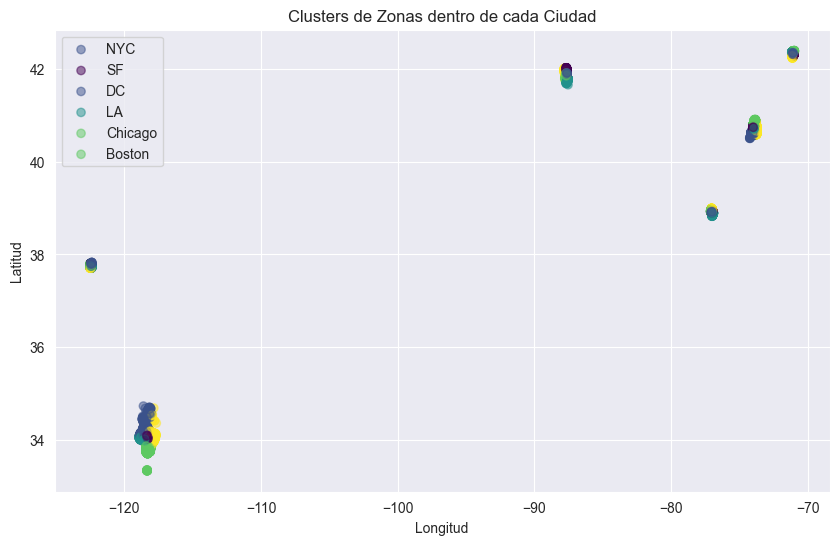

In [270]:
plt.figure(figsize=(10, 6))

for ciudad in data["city"].unique():
    subset = data[data["city"] == ciudad]
    plt.scatter(subset["longitude"], subset["latitude"], c=subset["zone"], cmap="viridis", alpha=0.5, label=ciudad)

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Clusters de Zonas dentro de cada Ciudad")
plt.legend()
plt.show()


In [271]:
data[['city', 'zone']]

,city,zone
0,NYC,1
1,NYC,0
2,NYC,3
3,SF,0
4,DC,1
...,...,...
74104,NYC,2
74105,LA,3
74106,NYC,2
74107,NYC,0


In [272]:
data = pd.get_dummies(data, columns=["zone"], prefix="zone")

In [277]:
data.drop(columns=["longitude","latitude"], inplace=True)
data["zone_0"] = data["zone_1"].astype(int)
data["zone_1"] = data["zone_2"].astype(int)
data["zone_2"] = data["zone_3"].astype(int)
data["zone_3"] = data["zone_4"].astype(int)
data["zone_4"] = data["zone_4"].astype(int)
data["bathrooms"] = data["bathrooms"].astype(int)
data.head()

KeyError: "['longitude', 'latitude'] not found in axis"

In [278]:
data.columns

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_response_rate', 'instant_bookable', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Lighthouse',
       'property_type_Loft', 'property_type_Other',
       'property_type_Parking Space', 'property_type_Serviced apartment',
       'property_type_Tent', 'property_type_

In [275]:
data = pd.get_dummies(data, columns=["city"])

KeyError: "None of [Index(['city'], dtype='object')] are in the [columns]"

In [279]:
data.drop(columns=["cancellation_policy_super_strict_30",'cancellation_policy_super_strict_60'], inplace=True)

In [280]:
data

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,...,zone_1,zone_2,zone_3,zone_4,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5.010635,3,1,1,-1.0,0,2,100.0,1.0,1.0,...,0,0,0,0,False,False,False,False,True,False
1,5.129899,7,3,1,1.0,1,6,93.0,3.0,3.0,...,0,0,0,0,False,False,False,False,True,False
2,4.976734,5,3,1,1.0,1,10,92.0,1.0,3.0,...,0,1,0,0,False,False,False,False,True,False
3,6.620073,4,2,1,-1.0,0,0,-1.0,2.0,2.0,...,0,0,0,0,False,False,False,False,False,True
4,4.744932,2,1,1,1.0,1,4,40.0,0.0,1.0,...,0,0,0,0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,4.605170,1,1,0,-1.0,0,0,-1.0,1.0,1.0,...,1,0,0,0,False,False,False,False,True,False
74105,5.043425,4,4,1,1.0,0,16,93.0,2.0,4.0,...,0,1,0,0,False,False,False,True,False,False
74106,5.220356,5,2,1,1.0,1,43,94.0,2.0,2.0,...,1,0,0,0,False,False,False,False,True,False
74107,5.273000,2,2,1,1.0,1,0,-1.0,0.0,2.0,...,0,0,0,0,False,False,False,False,True,False


In [281]:
data["city_Boston"] = data["city_Boston"].astype(int)
data["city_Chicago"] = data["city_Chicago"].astype(int)
data["city_DC"] = data["city_DC"].astype(int)
data["city_LA"] = data["city_LA"].astype(int)
data["city_NYC"] = data["city_NYC"].astype(int)
data["city_SF"] = data["city_SF"].astype(int)
data

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,...,zone_1,zone_2,zone_3,zone_4,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5.010635,3,1,1,-1.0,0,2,100.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,5.129899,7,3,1,1.0,1,6,93.0,3.0,3.0,...,0,0,0,0,0,0,0,0,1,0
2,4.976734,5,3,1,1.0,1,10,92.0,1.0,3.0,...,0,1,0,0,0,0,0,0,1,0
3,6.620073,4,2,1,-1.0,0,0,-1.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1
4,4.744932,2,1,1,1.0,1,4,40.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,4.605170,1,1,0,-1.0,0,0,-1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
74105,5.043425,4,4,1,1.0,0,16,93.0,2.0,4.0,...,0,1,0,0,0,0,0,1,0,0
74106,5.220356,5,2,1,1.0,1,43,94.0,2.0,2.0,...,1,0,0,0,0,0,0,0,1,0
74107,5.273000,2,2,1,1.0,1,0,-1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0


Estandarizar

In [282]:
data.describe()

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,...,zone_1,zone_2,zone_3,zone_4,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
count,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,...,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000
mean,4.782176,3.155190,1.706095,0.734067,0.463624,0.262438,20.901078,72.616322,1.263031,1.706095,...,0.253559,0.167685,0.072852,0.072852,0.046796,0.050183,0.076752,0.302973,0.436479,0.086818
std,0.717094,2.153599,1.258208,0.441832,0.850003,0.439962,37.829024,40.332674,0.855307,1.258208,...,0.435051,0.373589,0.259895,0.259895,0.211203,0.218324,0.266199,0.459547,0.495952,0.281570
min,2.302585,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,80.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.709530,2.000000,1.000000,1.000000,1.000000,0.000000,6.000000,94.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.220356,4.000000,2.000000,1.000000,1.000000,1.000000,23.000000,99.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7.600402,16.000000,18.000000,1.000000,1.000000,1.000000,605.000000,100.000000,10.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [283]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[["log_price", "accommodates", "bathrooms", "number_of_reviews", "bedrooms", "review_scores_rating", "beds", "host_response_rate"]])

data[["log_price", "accommodates", "bathrooms", "number_of_reviews", "bedrooms", "revie_scores_rating", "beds", "host_response_rate"]] = X_scaled

data

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,...,zone_2,zone_3,zone_4,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,revie_scores_rating
0,0.318592,-0.072061,-0.561195,1,-1.721916,0,-0.499648,100.0,-0.307531,-0.561195,...,0,0,0,0,0,0,0,1,0,0.678950
1,0.484908,1.785307,1.028378,1,0.631032,1,-0.393909,93.0,2.030826,1.028378,...,0,0,0,0,0,0,0,1,0,0.505392
2,0.271315,0.856623,1.028378,1,0.631032,1,-0.288169,92.0,-0.307531,1.028378,...,1,0,0,0,0,0,0,1,0,0.480598
3,2.562997,0.392281,0.233592,1,-1.721916,0,-0.552518,-1.0,0.861648,0.233592,...,0,0,0,0,0,0,0,0,1,-1.825240
4,-0.051938,-0.536403,-0.561195,1,0.631032,1,-0.446778,40.0,-1.476709,-0.561195,...,0,0,0,0,0,1,0,0,0,-0.808688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,-0.246840,-1.000746,-0.561195,0,-1.721916,0,-0.552518,-1.0,-0.307531,-0.561195,...,0,0,0,0,0,0,0,1,0,-1.825240
74105,0.364318,0.392281,1.823165,1,0.631032,0,-0.129560,93.0,0.861648,1.823165,...,1,0,0,0,0,0,1,0,0,0.505392
74106,0.611053,0.856623,0.233592,1,0.631032,1,0.584183,94.0,0.861648,0.233592,...,0,0,0,0,0,0,0,1,0,0.530186
74107,0.684466,-0.536403,0.233592,1,0.631032,1,-0.552518,-1.0,-1.476709,0.233592,...,0,0,0,0,0,0,0,1,0,-1.825240


In [284]:
# exportar como csv
data.to_csv("../data/processed/airbnb_features.csv", index=False)